# *Wine Quality Classification Using SVM (RBF Kernel)*

### **1. Project Overview**
This project aims to classify wine quality using Support Vector Machine (SVM) with an RBF kernel.
The dataset contains various physicochemical tests of wines, and the target variable is wine quality.
Our objective is to build a classification model to predict wine quality categories.


### **2. Importing Libraries**
I start by importing the necessary libraries for data manipulation, visualization, and modeling.


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### **3. Loading the Dataset**
Here I load the wine quality dataset and take a first look at its structure.


In [5]:
import ssl

# Set the path to the CA certificates bundle
ssl._create_default_https_context = ssl._create_unverified_context

### **4. Data Preprocessing**
In this step, I handle missing values, scale features, and prepare the target variable for classification.


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/winequality.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### **5. Exploratory Data Analysis (EDA)**
I visualize the dataset to understand feature distributions, relationships, and class imbalance.


In [7]:
# check for missing values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### **6. Train-Test Split**
I split the dataset into training and testing sets to e
valuate the model's generalization ability.


In [8]:
# check if the target is classification 
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### **7. Model Training - SVM with RBF Kernel**
I train an SVM classifier using the RBF kernel and default parameters.


In [9]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

### **8. Model Evaluation**
I evaluate the model performance using accuracy, confusion matrix, and classification report.


<Axes: xlabel='quality', ylabel='count'>

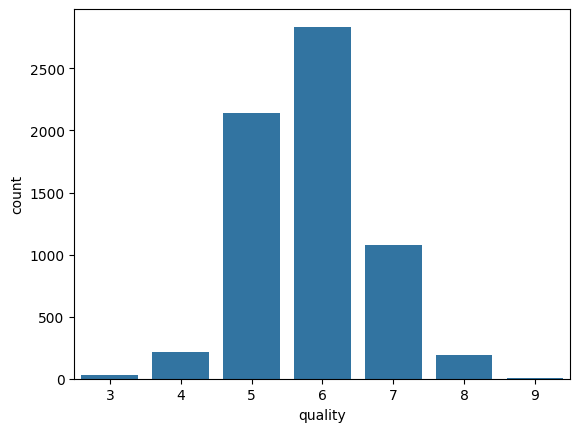

In [10]:
import seaborn as sns
sns.countplot(x='quality', data=df)

### **9. Hyperparameter Tuning**
I perform GridSearchCV to find the optimal parameters for the SVM model.


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters : {'model__C': 10, 'model__gamma': 1, 'model__kernel': 'rbf'}
Best CV accuracy: 0.626
Test accuracy   : 0.642
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.44      0.09      0.15        43
           5       0.68      0.69      0.69       428
           6       0.63      0.71      0.67       567
           7       0.62      0.55      0.58       216
           8       0.57      0.33      0.42        39
           9       0.00      0.00      0.00         1

    accuracy                           0.64      1300
   macro avg       0.42      0.34      0.36      1300
weighted avg       0.63      0.64      0.63      1300



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

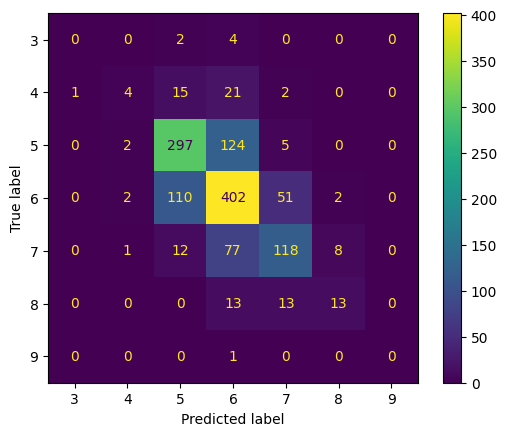

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/winequality.csv')
X = df.drop('quality', axis=1)
y = df['quality']

# Split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',  StandardScaler()),
    ('model',   SVC(class_weight='balanced'))
])

# Parameter grid (note the model__ prefix!)
param_grid = {
    'model__C':      [0.1, 1, 10, 100],
    'model__gamma':  ['scale', 0.01, 0.1, 1],
    'model__kernel': ['rbf']
}

# Grid search
grid_search = GridSearchCV(pipeline,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Results
print("Best parameters :", grid_search.best_params_)
print("Best CV accuracy:", round(grid_search.best_score_, 3))

y_pred = grid_search.predict(X_test)
print("Test accuracy   :", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


### **10. Final Model: Binary Classification with SVM (RBF) and SMOTE**

In this final approach, I simplify the wine quality prediction problem into a **binary classification task**:
- **Good wine** (label = 1) if quality ≥ 6
- **Bad wine** (label = 0) if quality < 6

I use:
- **SVM with RBF kernel** for classification
- **SMOTE** for handling class imbalance
- A **Pipeline** to ensure preprocessing, balancing, and scaling are applied consistently during cross-validation.

I also perform **hyperparameter tuning** using GridSearchCV to find the best SVM parameters.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params : {'model__C': 1, 'model__gamma': 1, 'model__kernel': 'rbf'}
CV accuracy : 0.7847
Test accuracy: 0.7846
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       477
           1       0.84      0.82      0.83       823

    accuracy                           0.78      1300
   macro avg       0.77      0.77      0.77      1300
weighted avg       0.79      0.78      0.79      1300



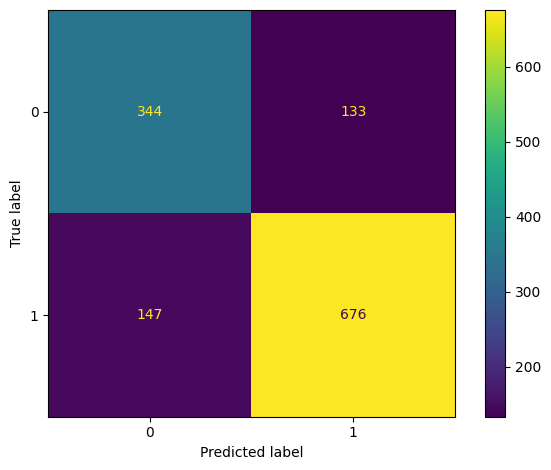

In [13]:
# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline            # imblearn version
from imblearn.over_sampling import SMOTE

# 2. Load the dataset

df = pd.read_csv(
    "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/winequality.csv"
)


# 3. Convert target into binary classification
# ---------------------------------------------------------
# Good wine = 1 if quality ≥ 6, else Bad wine = 0
df["quality"] = df["quality"].apply(lambda x: 1 if x >= 6 else 0)

# Features (X) and target (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# 4. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Build pipeline: Imputation → SMOTE → Scaling → SVM
pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("smote", SMOTE(random_state=42, k_neighbors=5)),
        ("scaler", StandardScaler()),
        ("model", SVC(probability=False, class_weight="balanced")),
    ]
)

# 6. Define hyperparameter search space
param_grid = {
    "model__C": [0.1, 1, 10, 100],
    "model__gamma": ["scale", 0.01, 0.1, 1],
    "model__kernel": ["rbf"],
}

# 7. Perform Grid Search with cross-validation
gs = GridSearchCV(
    pipe, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)
gs.fit(X_train, y_train)

# 8. Evaluate the best model on the test set
print("Best params :", gs.best_params_)
print("CV accuracy :", round(gs.best_score_, 4))
y_pred = gs.predict(X_test)
print("Test accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.tight_layout()
plt.show()


### **11. Conclusion**

In this project, I developed a **binary classification model** to predict wine quality using a Support Vector Machine (SVM) with an RBF kernel.  
I transformed the target variable into two categories:
- **1 (Good wine)** if quality ≥ 6
- **0 (Bad wine)** if quality < 6

To address **class imbalance**, I applied SMOTE and integrated it directly into the modeling pipeline to prevent data leakage during cross-validation.  
I performed hyperparameter tuning with GridSearchCV to find the optimal parameters.

### **Final Model Performance**
- **Best Parameters:** C = 1, gamma = 1, kernel = 'rbf'  
- **Cross-Validation Accuracy:** 78.47%  
- **Test Accuracy:** 78.46%  
- **Precision / Recall:**  
  - Class 0 (Bad wine): Precision = 0.70, Recall = 0.72  
  - Class 1 (Good wine): Precision = 0.84, Recall = 0.82  

The confusion matrix shows that the model performs consistently across both classes, with slightly better performance for detecting **good wines**.

### **Key Takeaways**
1. Applying **feature scaling** and **SMOTE** significantly improved class balance and overall generalization.
2. The tuned hyperparameters (`C=1`, `gamma=1`) offered a good trade-off between bias and variance.
3. This pipeline can be adapted to other classification problems involving imbalanced datasets.

### **Next Steps**
- Experiment with other models such as Random Forest or Gradient Boosting for comparison.
- Try feature selection or dimensionality reduction (e.g., PCA) to see if performance improves.
- Explore more advanced resampling methods or ensemble approaches for further enhancements.

This project represents my complete **end-to-end machine learning workflow**: from data preprocessing and handling imbalance to model tuning and evaluation. It serves as a robust template I can adapt for similar real-world classification challenges.


____
____

In this project, "good" or "bad" refers to the quality of wine as measured by physicochemical tests and expert ratings. Specifically:

Good wine: Wines with a quality score of 6 or higher (on a scale typically from 0 to 10).
Bad wine: Wines with a quality score less than 6.
The classification helps predict whether a wine sample is likely to be considered good or bad based on its chemical properties, which is useful for wine producers, quality control, and consumers.